In [5]:
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


from crlx import SIKULIAQ
from crlx.core import match_variable
from crlx.dpa.co2 import CO2
from crlx.converters import mbar2atm
from crlx.flagging.qartod import *

In [10]:
skq = SIKULIAQ(verify = True,verbose = True)
# bdt = datetime(2024,8,25)
# edt = datetime(2024,8,26,23,59,59,999999)

edt = datetime.now(timezone.utc)

bdt = edt - timedelta(hours = 1)

In [11]:
%%time
apollo = skq.get_wet_lab_apollo(bdt, edt)
a_air = apollo.sel(sample_source = 'air')
a_sw = apollo.sel(sample_source = 'seawater')


C:\Users\Ian\projects\python3-crlx\crlx\core.py:92: UserWarning: No data available for request.
  warnings.warn('No data available for request.')
C:\Users\Ian\projects\python3-crlx\crlx\vessel\sikuliaq.py:254: UserWarning: No Data 2024-08-27 19:08:12.496138+00:00- 2024-08-27 20:08:12.496138+00:00
  warnings.warn(f'No Data {bdt}- {edt}')


AttributeError: 'NoneType' object has no attribute 'sel'

In [12]:
%%time
ldeo = skq.get_wet_lab_ldeo(bdt, edt)
l_air = ldeo.sel(sample_source = 'air')
l_sw = ldeo.sel(sample_source = 'seawater')

C:\Users\Ian\projects\python3-crlx\crlx\vessel\sikuliaq.py:130: UserWarning: No Data 2024-08-27 19:08:12.496138+00:00- 2024-08-27 20:08:12.496138+00:00
  warnings.warn(f'No Data {bdt}- {edt}')


AttributeError: 'NoneType' object has no attribute 'sel'

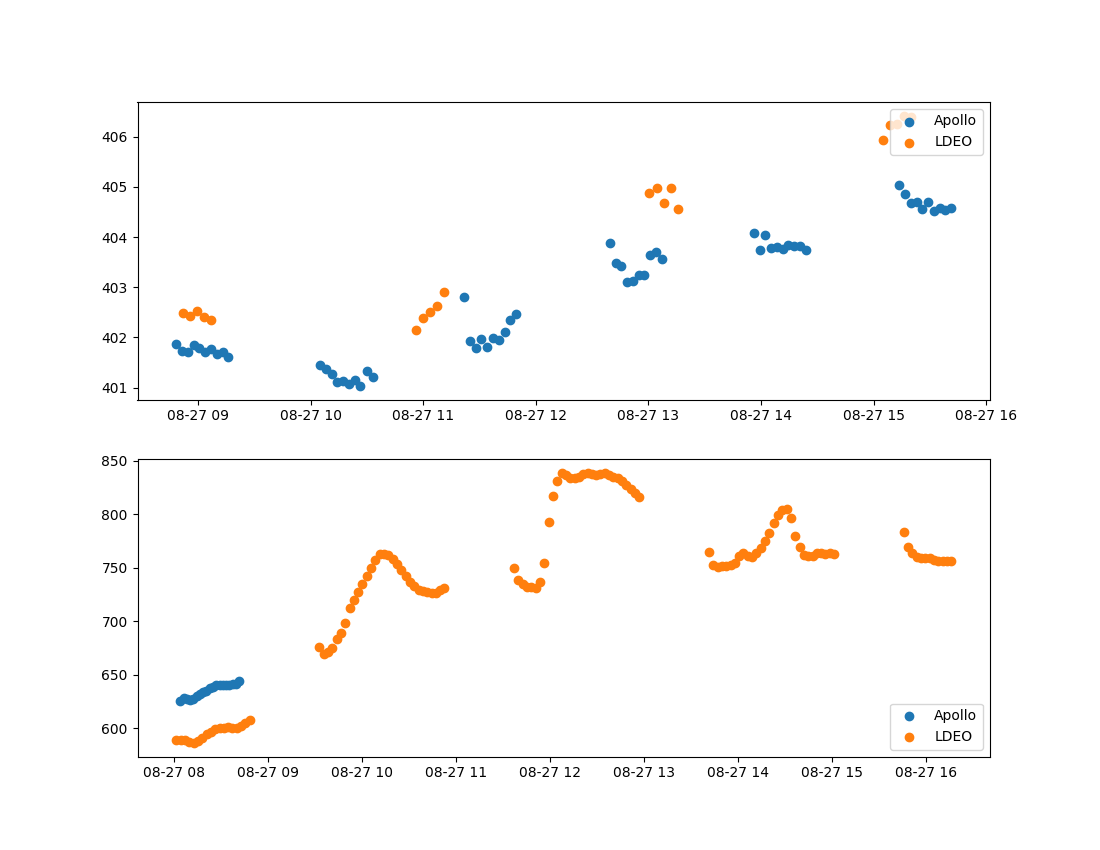

In [9]:
%matplotlib widget
fig, ax = plt.subplots(2,1, figsize = (11,8.5))

ax[0].scatter(a_air.time, a_air.pco2, label = 'Apollo')
ax[0].scatter(l_air.time, l_air.pco2, label = 'LDEO')
ax[0].legend(loc = 'upper right')

ax[1].scatter(a_sw.time, a_sw.pco2, label = 'Apollo')
ax[1].scatter(l_sw.time, l_sw.pco2, label = 'LDEO')
ax[1].legend(loc = 'lower right')
